# Project 2: Heart Failure Prediction Dataset

ITCS 3162-001: Emily Santacruz Garcia

In [132]:
!pip install scikit-learn
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install graphviz

### Import some libraries first

In [134]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [135]:
# Load dataset
heart = pd.read_csv('heart.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Meaning of Variables

#### The attributes and descriptions in the dataset that will be used for this project are as follows:
Age: Age of the patient in years

Sex: Sex of the patient [M: Male, F: Female]

ChestPainType: Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: Resting blood pressure [mm Hg]

Cholesterol: Serum cholesterol [mm/dl]

FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]

Oldpeak: ST [Numeric value measured in depression]

ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: Output class [1: heart disease, 0: Normal]


In [138]:
# Check for nulls
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [139]:
# Drop rows with missing values to avoid errors in encoding
heart = heart.dropna()

In [140]:
# Describe the database
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [141]:
# First five rows to understand the structure
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [142]:
# Check for datatypes of the database columns
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

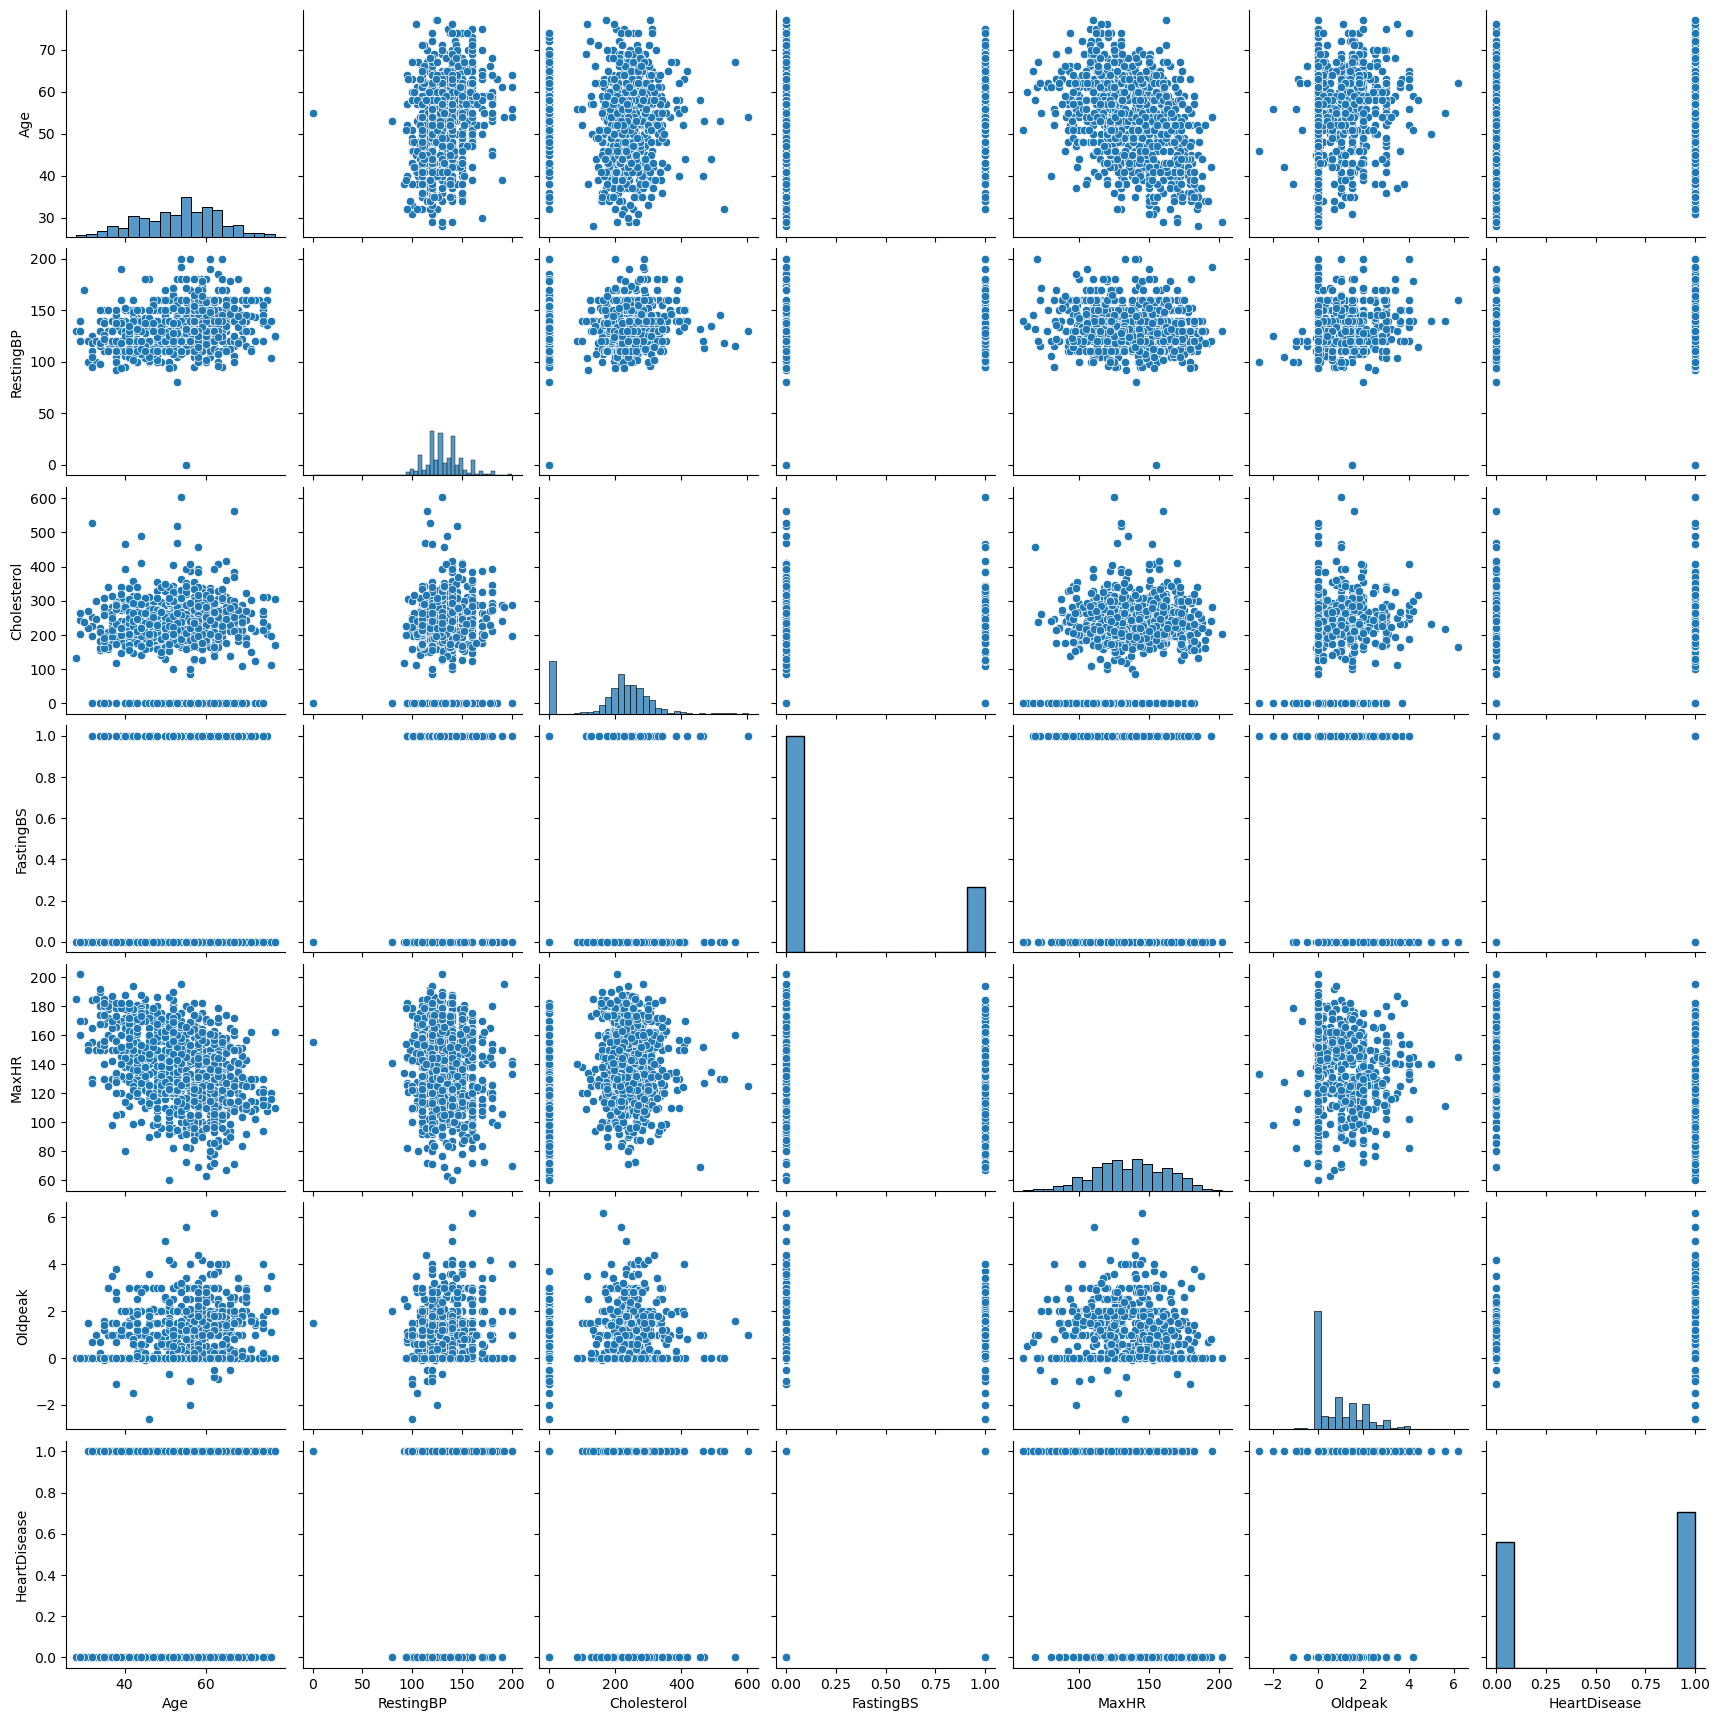

In [143]:
# Pairplots to quickly see how the features relate to each other and also their individual distributions (on the diagonal).
sns.pairplot(data = heart)

In [144]:
# How many bins each of the categorical variables have
for col in heart.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}:\n{heart[col].value_counts()}\n")
# Display value counts only for categorical columns


Sex:
Sex
M    725
F    193
Name: count, dtype: int64

ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64



### Data Understanding/Visualization

To further understand and visualize the data for this project, we began by importing the essential libraries required for our analysis. After loading the dataset, I checked for null values and found that it was relatively clean, with no missing entries. I then dropped any rows with missing values to avoid errors during encoding. Using methods like "describe," "head," and examining data types, I gained a quick overview of the dataset and identified necessary changes.

I noticed that some categorical data would need to be transformed into binary values in later steps. Next, I created pair plots to quickly observe how the features relate to one another, as well as to see their individual distributions (noted on the diagonal). One key trend that stood out from the pair plots was that Age follows a normal distribution and has a negative correlation with MaxHR. Resting Blood Pressure (RestingBP) appeared to be uniformly distributed, with no strong correlations present. Cholesterol levels clustered around zero, which could indicate missing data. Fasting Blood Sugar (FastingBS) was predominantly zero, while Oldpeak mostly clustered around zero but varied with the presence of heart disease. It seems that a higher Oldpeak and a lower MaxHR may be linked to heart disease.

Further analysis can refine these insights for predictive modeling. These steps relate to our modeling efforts as we focus on understanding how various features contribute to the development of heart failure, how they are interlinked, which features are most important, and how detecting a single feature could lead to early intervention in preventing heart failure.

I decided to analyze the value counts of categorical variables in a dataset related to heart disease because understanding the distribution of categorical variables is crucial for data preprocessing, feature engineering, and model performance in machine learning and statistical analysis. I observed that there are more male patients than female patients in the dataset, which could lead to an unfair representation of women in predictions.

Categorical data must be encoded (e.g., One-Hot Encoding or Label Encoding) before being fed into machine learning models. Understanding the number of unique values helps in deciding the appropriate encoding method. Additionally, unexpected values or incorrect labels, such as misspelled categories, can be identified, which aids in cleaning the dataset before analysis. It's also important to note that imbalanced categorical features can affect the predictive power of models. Some categories may be highly correlated with the target variable; for example, certain types of chest pain could serve as strong indicators of heart disease.



## Analyzing Most Influential Features on Heart Disease Prediction

In [147]:
# Target is 'HeartDisease'
# The first decision tree will focus on the most influential features on heart disease prediction: chest pain type, exercise angina, old peak (ST depression), ST slope, maximum heart rate achieved, and resting blood pressure
# Drop age, sex, cholesterol, fasting blood sugar, and abnormal electrocardiogram results

heart = heart.drop(['Age', 'Sex', 'Cholesterol', 'FastingBS', 'RestingECG'], axis=1)

# Look at new dataset
heart 

,ChestPainType,RestingBP,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,ATA,140,172,N,0.0,Up,0
1,NAP,160,156,N,1.0,Flat,1
2,ATA,130,98,N,0.0,Up,0
3,ASY,138,108,Y,1.5,Flat,1
4,NAP,150,122,N,0.0,Up,0
...,...,...,...,...,...,...,...
913,TA,110,132,N,1.2,Flat,1
914,ASY,144,141,N,3.4,Flat,1
915,ASY,130,115,Y,1.2,Flat,1
916,ATA,130,174,N,0.0,Flat,1


In [148]:
# We will now turn vairables such as Y/N into dummy variables instead
# This allows Python to treat these as numerical vairables
# We use dummy coding using pd.get_dummies() and
# checking dtypes of coded variables

heart = pd.get_dummies(heart, drop_first = True, dtype = int)
heart
# Encode categorical variables using One-Hot Encoding for
# 'ChestPainType', 'ExerciseAngina', 'ST_Slope'

,RestingBP,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,140,172,0.0,0,1,0,0,0,0,1
1,160,156,1.0,1,0,1,0,0,1,0
2,130,98,0.0,0,1,0,0,0,0,1
3,138,108,1.5,1,0,0,0,1,1,0
4,150,122,0.0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
913,110,132,1.2,1,0,0,1,0,1,0
914,144,141,3.4,1,0,0,0,0,1,0
915,130,115,1.2,1,0,0,0,1,1,0
916,130,174,0.0,1,1,0,0,0,1,0


In [149]:
# make y (dependent variable) as np.array for 'HeartDisease'
y = np.array(heart['HeartDisease'])

# make x a dataframe subset with independent variables
X = heart[['RestingBP', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]


In [150]:
# Split dataset into training and testing data (80% training, 20% testing)
# The reason because relatively small (918 samples), an 80-20 split is the better choice
# It ensures the model has more training data to learn patterns effectively while still keeping a reasonable portion for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
# Initialize the Decision Tree Classifier
# Using 'gini' as the splitting criterion and setting a fixed random state for reproducibility
HeartDecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Train (fit) the model using the training data
# The model will learn patterns from X_train (features) and y_train (labels)
HeartDecisionTree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [152]:
# Predict the responses for test dataset
y_predict = HeartDecisionTree.predict(X_test)

In [153]:
# the values are all 0s and 1s as expected
y_predict

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1])

In [154]:
# If training accuracy is much higher than testing, the model overfits (too deep).  
# If both are low, the model under fits (too shallow).  
# The best max_depth balances both for good generalization.

print('Training accuracy: ',HeartDecisionTree.score(X_train,y_train))
print('Test Accuracy: ',HeartDecisionTree.score(X_test,y_test))

Training accuracy:  0.8596730245231607
Test Accuracy:  0.8315217391304348


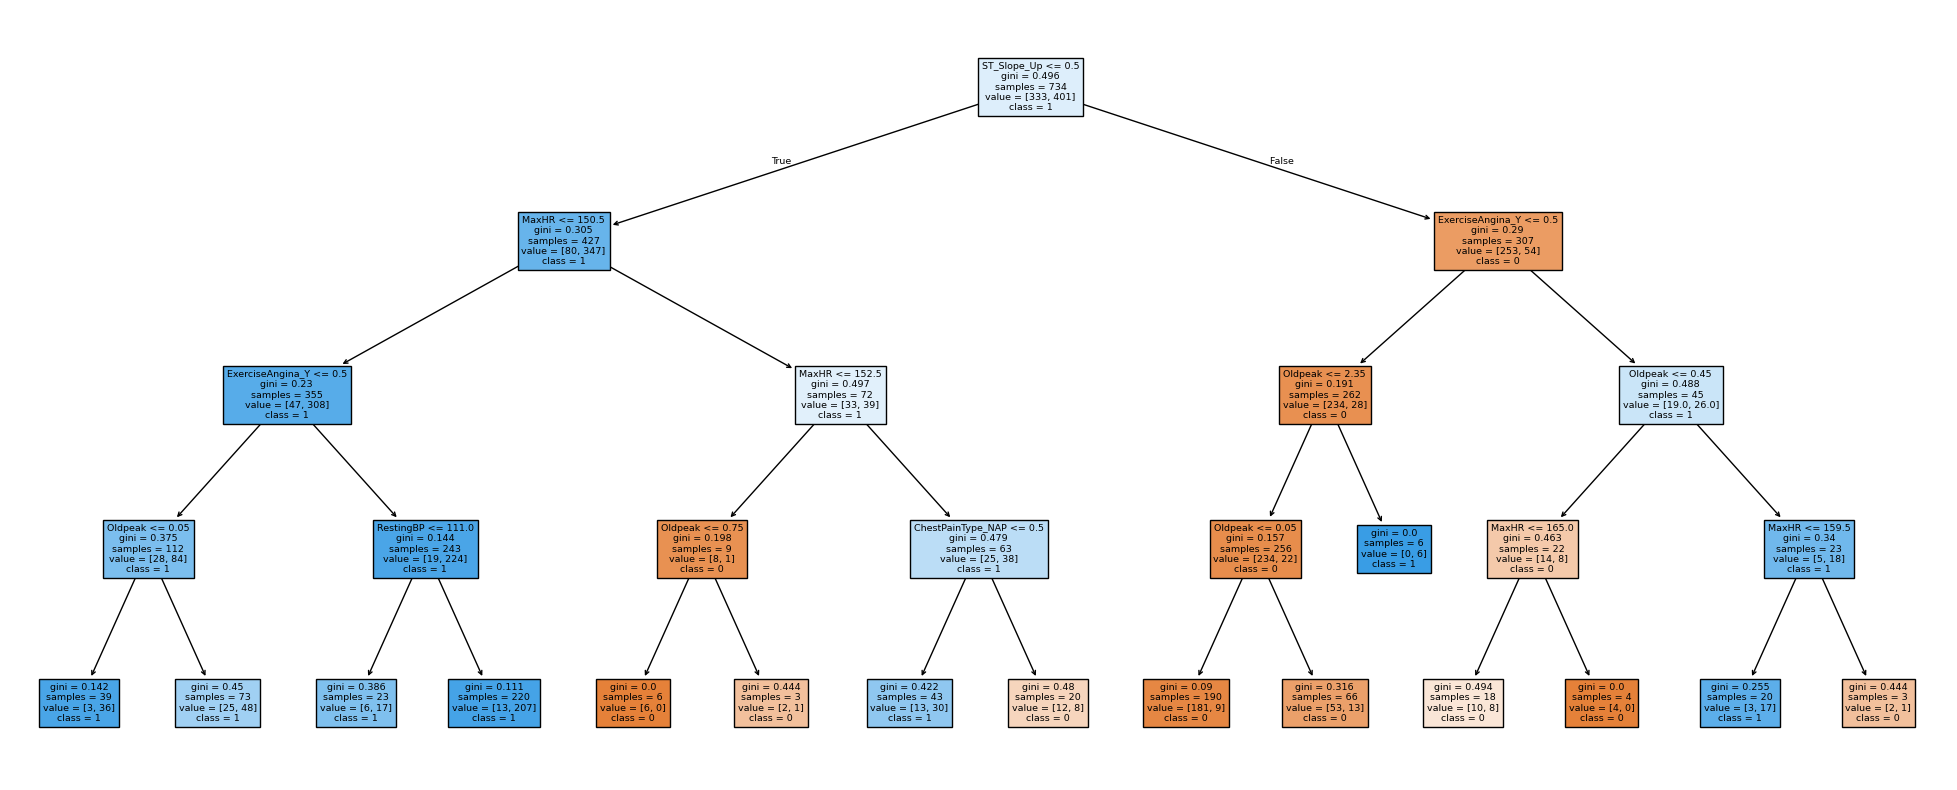

In [155]:
# Plot Decision Tree

plt.figure(figsize = (25, 10))
plot_tree(HeartDecisionTree,
          feature_names = list(X_train.columns),
          class_names = HeartDecisionTree.classes_.astype(str).tolist(),
          filled = True)
plt.show()

In [156]:
# 'feature_importances_' gives a score indicating how much each feature contributes to the model.
# It loops through 'X_train.columns' (feature names) and their corresponding importance values.
# The higher the value, the more influence the feature has in predicting heart disease.

importances = HeartDecisionTree.feature_importances_

for name, importance in zip(X_train.columns , importances):
    print(name, "=", importance)

# ST_Slope_Up has the most influence.

RestingBP = 0.008086612201411568
MaxHR = 0.09165212462751161
Oldpeak = 0.0952212081336896
ChestPainType_ATA = 0.0
ChestPainType_NAP = 0.011537530256171356
ChestPainType_TA = 0.0
ExerciseAngina_Y = 0.10281621870488332
ST_Slope_Flat = 0.0
ST_Slope_Up = 0.6906863060763325


In [157]:
importances = HeartDecisionTree.feature_importances_ #feature importance array
importances = pd.Series(data = importances, index = X.columns) #convert to Pandas series for plotting
importances.sort_values(ascending=False, inplace=True) #sort descending

/var/folders/3z/3j4xlgf52f91jxrqpw9zx7m80000gn/T/ipykernel_92583/1612830210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=importances, y=importances.index, palette=sns.color_palette("BuGn_r", n_colors=len(importances)))
/var/folders/3z/3j4xlgf52f91jxrqpw9zx7m80000gn/T/ipykernel_92583/1612830210.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


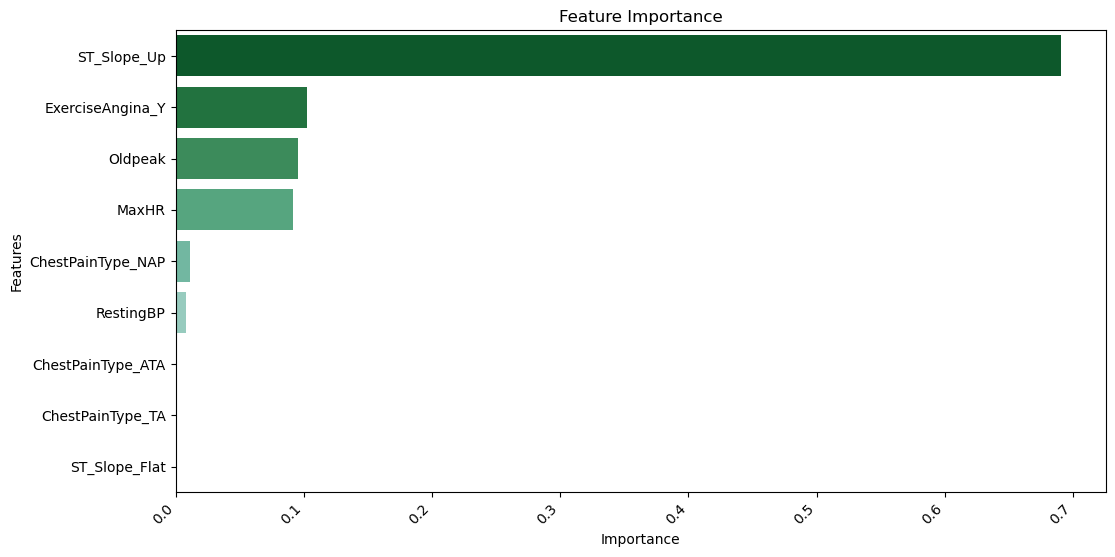

In [158]:
#create bar plot
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=importances, y=importances.index, palette=sns.color_palette("BuGn_r", n_colors=len(importances)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [159]:
from sklearn import metrics
# Calculate accuracy for complete decision tree
accuracy = metrics.accuracy_score(y_test, y_predict)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predict)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.8315217391304348

Confusion Matrix:
 [[67 10]
 [21 86]]


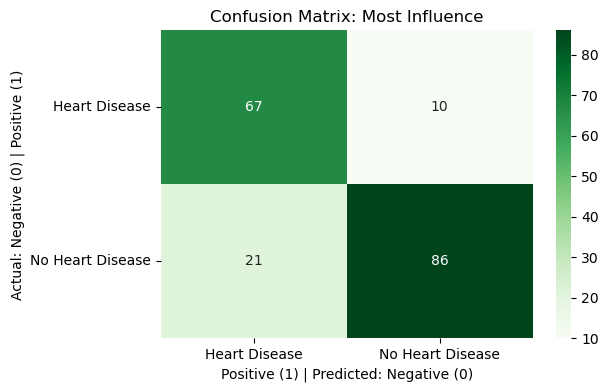

In [160]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Heart Disease', 'No Heart Disease'], 
            yticklabels=['Heart Disease', 'No Heart Disease'])

plt.xlabel("Positive (1) | Predicted: Negative (0)")
plt.ylabel("Actual: Negative (0) | Positive (1)")
plt.yticks(rotation=0)
plt.title("Confusion Matrix: Most Influence")
plt.show()

## Analyzing Least Influential Features on Heart Disease Prediction

In [162]:
# Load dataset
heart = pd.read_csv('heart.csv')

# Target is 'HeartDisease'
# The second decision tree will focus on the least influential features on heart disease prediction: age, sex, cholesterol, fasting blood sugar, and abnormal electrocardiogram results
# Drop chest pain type, exercise angina, old peak (ST depression), ST slope, maximum heart rate achieved, and resting blood pressure
heart = heart.drop(['RestingBP', 'MaxHR', 'Oldpeak', 'ChestPainType','ExerciseAngina', 'ST_Slope'], axis=1)
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           918 non-null    int64 
 1   Sex           918 non-null    object
 2   Cholesterol   918 non-null    int64 
 3   FastingBS     918 non-null    int64 
 4   RestingECG    918 non-null    object
 5   HeartDisease  918 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 43.2+ KB


In [163]:
# We will now turn vairables such as Y/N into dummy variables instead
# This allows Python to treat these as numerical vairables
# We use dummy coding using pd.get_dummies() and
# checking dtypes of coded variables

heart = pd.get_dummies(heart, drop_first = True, dtype = int)
heart

,Age,Cholesterol,FastingBS,HeartDisease,Sex_M,RestingECG_Normal,RestingECG_ST
0,40,289,0,0,1,1,0
1,49,180,0,1,0,1,0
2,37,283,0,0,1,0,1
3,48,214,0,1,0,1,0
4,54,195,0,0,1,1,0
...,...,...,...,...,...,...,...
913,45,264,0,1,1,1,0
914,68,193,1,1,1,1,0
915,57,131,0,1,1,1,0
916,57,236,0,1,0,0,0


In [164]:
# make y (dependent variable) as np.array for 'HeartDisease'
y = np.array(heart['HeartDisease'])

# make x a dataframe subset with independent variables
X = heart[['Age', 'Cholesterol', 'FastingBS', 'Sex_M', 'RestingECG_Normal', 'RestingECG_ST']]


In [165]:
# Split dataset into training and testing data (80% training, 20% testing)
# The reason because relatively small (918 samples), an 80-20 split is the better choice
# It ensures the model has more training data to learn patterns effectively while still keeping a reasonable portion for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
# Initialize the Decision Tree Classifier
# Using 'gini' as the splitting criterion and setting a fixed random state for reproducibility
Heart2DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Train (fit) the model using the training data
# The model will learn patterns from X_train (features) and y_train (labels)
Heart2DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [167]:
# Predict the responses for test dataset
y_predict_2 = Heart2DecisionTree.predict(X_test)

In [168]:
# the values are all 0s and 1s as expected
y_predict_2

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1])

In [169]:
# If training accuracy is much higher than testing, the model overfits (too deep).  
# If both are low, the model under fits (too shallow).  
# The best max_depth balances both for good generalization.

print('Training accuracy: ',Heart2DecisionTree.score(X_train,y_train))
print('Test Accuracy: ',Heart2DecisionTree.score(X_test,y_test))

Training accuracy:  0.7329700272479565
Test Accuracy:  0.6739130434782609


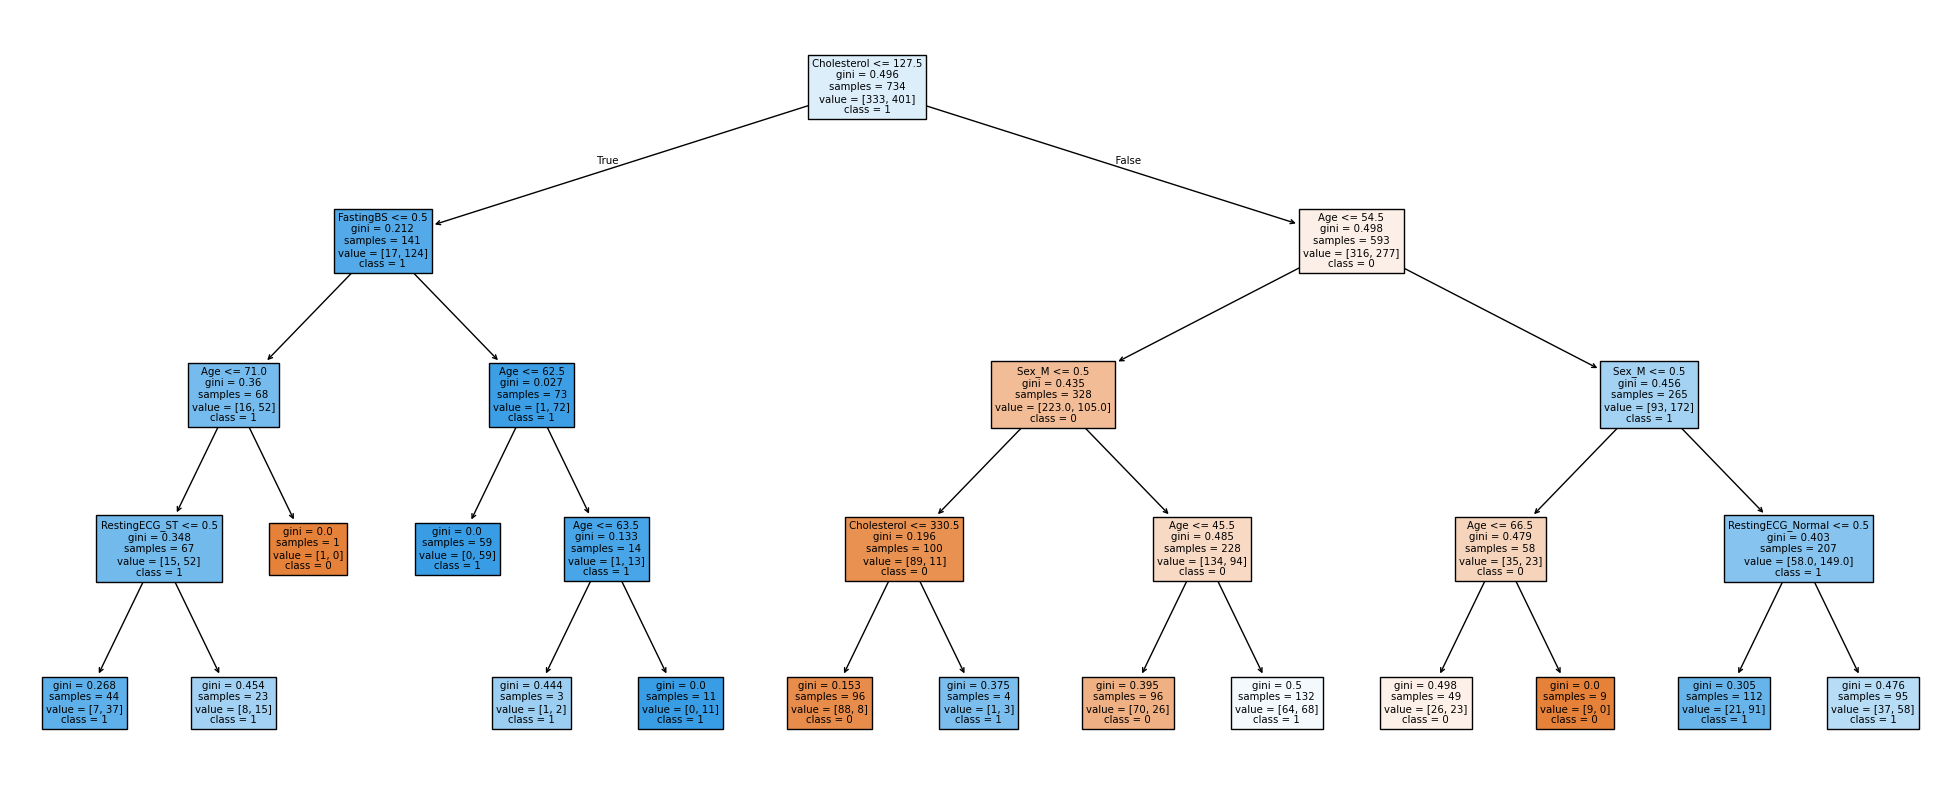

In [170]:
# Plot Decision Tree

plt.figure(figsize = (25, 10))
plot_tree(Heart2DecisionTree,
          feature_names = list(X_train.columns),
          class_names = Heart2DecisionTree.classes_.astype(str).tolist(),
          filled = True)
plt.show()

In [171]:
# 'feature_importances_' gives a score indicating how much each feature contributes to the model.
# It loops through 'X_train.columns' (feature names) and their corresponding importance values.
# The higher the value, the more influence the feature has in predicting heart disease.

importances = Heart2DecisionTree.feature_importances_

for name, importance in zip(X_train.columns , importances):
    print(name, "=", importance)

# Age has the most influence, cholesterol is close second.

Age = 0.3734138820824638
Cholesterol = 0.36153051170366274
FastingBS = 0.029659312937137743
Sex_M = 0.1901916266504916
RestingECG_Normal = 0.03597389469567992
RestingECG_ST = 0.009230771930564105


In [172]:
importances = Heart2DecisionTree.feature_importances_ #feature importance array
importances = pd.Series(data = importances, index = X.columns) #convert to Pandas series for plotting
importances.sort_values(ascending=False, inplace=True) #sort descending

/var/folders/3z/3j4xlgf52f91jxrqpw9zx7m80000gn/T/ipykernel_92583/3448970942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=importances, y=importances.index, palette=sns.color_palette("BuGn_r", n_colors=len(importances)))
/var/folders/3z/3j4xlgf52f91jxrqpw9zx7m80000gn/T/ipykernel_92583/3448970942.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


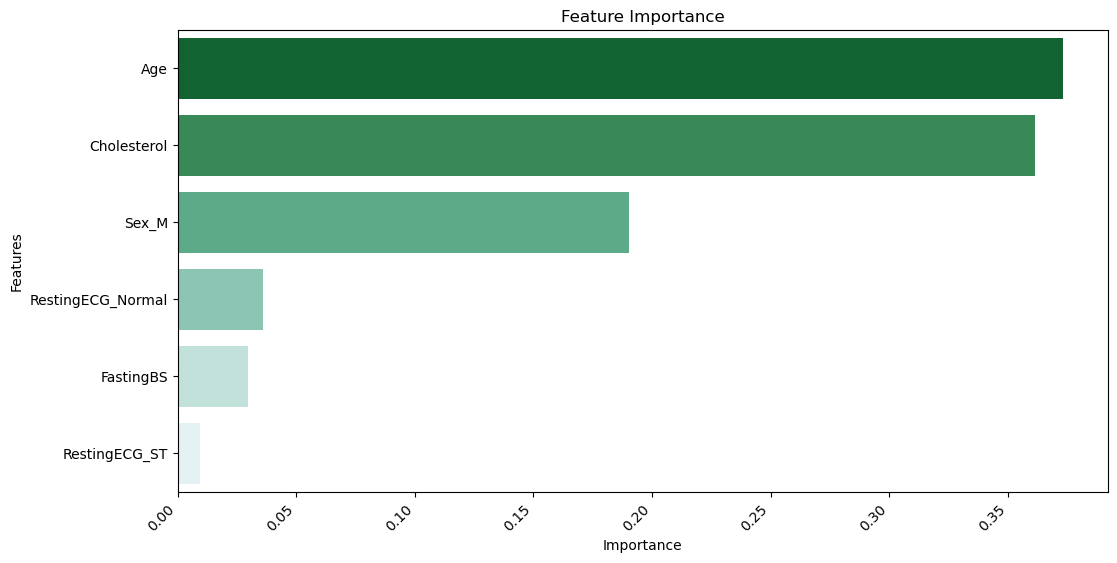

In [173]:
#create bar plot
plt.figure(figsize=(12,6))
chart = sns.barplot(x=importances, y=importances.index, palette=sns.color_palette("BuGn_r", n_colors=len(importances)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [174]:
from sklearn import metrics
# Calculate accuracy for complete decision tree
accuracy = metrics.accuracy_score(y_test, y_predict_2)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predict_2)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.6739130434782609

Confusion Matrix:
 [[38 39]
 [21 86]]


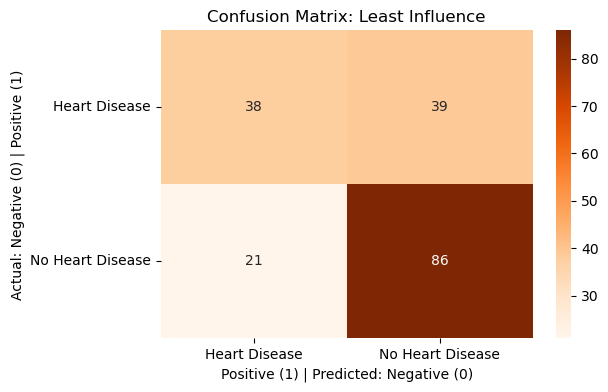

In [175]:
# Compute confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_predict_2)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Heart Disease', 'No Heart Disease'], 
            yticklabels=['Heart Disease', 'No Heart Disease'])

plt.xlabel("Positive (1) | Predicted: Negative (0)")
plt.ylabel("Actual: Negative (0) | Positive (1)")
plt.yticks(rotation=0)
plt.title("Confusion Matrix: Least Influence")
plt.show()

## Analyzing All Features on Heart Disease Prediction

In [177]:
# Load dataset
heart = pd.read_csv('heart.csv')

# Target is 'HeartDisease'
# The third decision tree focuses on all the features
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [178]:
# We will now turn vairables such as Y/N into dummy variables instead
# This allows Python to treat these as numerical vairables
# We use dummy coding using pd.get_dummies() and
# checking dtypes of coded variables

heart = pd.get_dummies(heart, drop_first = True, dtype = int)
heart

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [179]:
# make y (dependent variable) as np.array for 'HeartDisease'
y = np.array(heart['HeartDisease'])

# make x a dataframe subset with independent variables
X = heart[['Age', 'Cholesterol', 'FastingBS', 'Sex_M', 'RestingECG_Normal', 'RestingECG_ST', 'RestingBP', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]

In [180]:
# Split dataset into training and testing data (80% training, 20% testing)
# The reason because relatively small (918 samples), an 80-20 split is the better choice
# It ensures the model has more training data to learn patterns effectively while still keeping a reasonable portion for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
# Initialize the Decision Tree Classifier
# Using 'gini' as the splitting criterion and setting a fixed random state for reproducibility
AllHeartDecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Train (fit) the model using the training data
# The model will learn patterns from X_train (features) and y_train (labels)
AllHeartDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [182]:
# Predict the responses for test dataset
y_predict_3 = AllHeartDecisionTree.predict(X_test)

In [183]:
# the values are all 0s and 1s as expected
y_predict_3

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [184]:
# If training accuracy is much higher than testing, the model overfits (too deep).  
# If both are low, the model under fits (too shallow).  
# The best max_depth balances both for good generalization.

print('Training accuracy: ', AllHeartDecisionTree.score(X_train,y_train))
print('Test Accuracy: ', AllHeartDecisionTree.score(X_test,y_test))

Training accuracy:  0.8801089918256131
Test Accuracy:  0.875


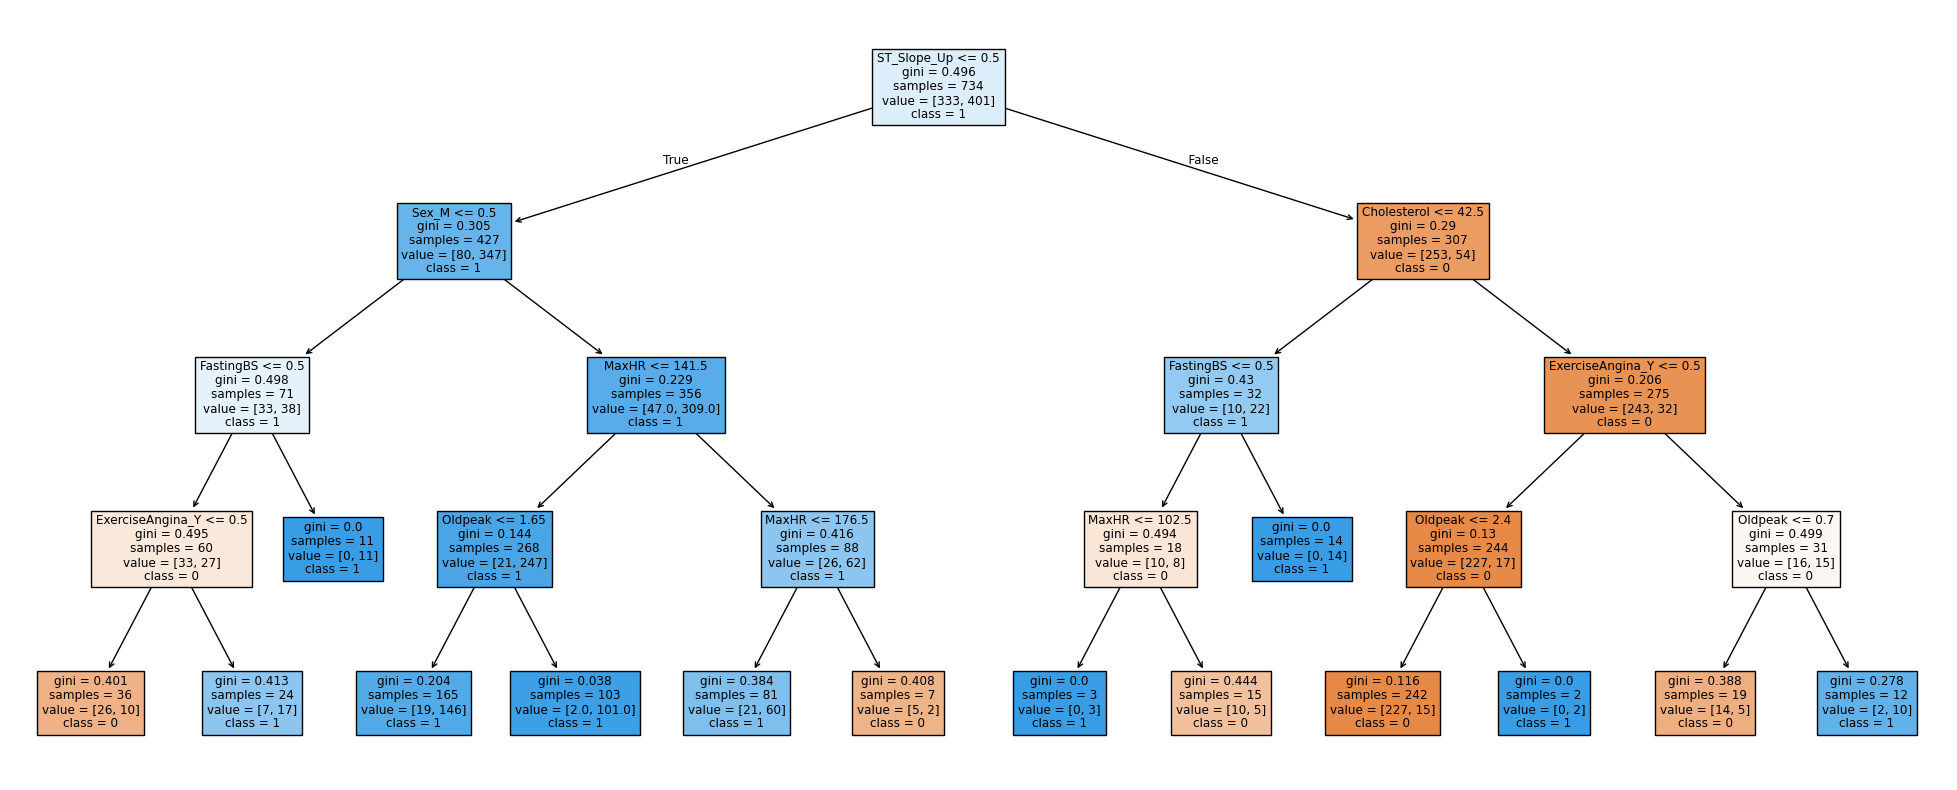

In [185]:
# Plot Decision Tree

plt.figure(figsize = (25, 10))
plot_tree(AllHeartDecisionTree,
          feature_names = list(X_train.columns),
          class_names = AllHeartDecisionTree.classes_.astype(str).tolist(),
          filled = True)
plt.show()

In [186]:
# 'feature_importances_' gives a score indicating how much each feature contributes to the model.
# It loops through 'X_train.columns' (feature names) and their corresponding importance values.
# The higher the value, the more influence the feature has in predicting heart disease.

importances = AllHeartDecisionTree.feature_importances_

for name, importance in zip(X_train.columns , importances):
    print(name, "=", importance)

Age = 0.0
Cholesterol = 0.08406044265329564
FastingBS = 0.0471311958975314
Sex_M = 0.058928691254859375
RestingECG_Normal = 0.0
RestingECG_ST = 0.0
RestingBP = 0.0
MaxHR = 0.05005230741854571
Oldpeak = 0.042411790660773115
ChestPainType_ATA = 0.0
ChestPainType_NAP = 0.0
ChestPainType_TA = 0.0
ExerciseAngina_Y = 0.06642203915474776
ST_Slope_Flat = 0.0
ST_Slope_Up = 0.650993532960247


In [187]:
importances = AllHeartDecisionTree.feature_importances_ #feature importance array
importances = pd.Series(data = importances, index = X.columns) #convert to Pandas series for plotting
importances.sort_values(ascending=False, inplace=True) #sort descending

/var/folders/3z/3j4xlgf52f91jxrqpw9zx7m80000gn/T/ipykernel_92583/3448970942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=importances, y=importances.index, palette=sns.color_palette("BuGn_r", n_colors=len(importances)))
/var/folders/3z/3j4xlgf52f91jxrqpw9zx7m80000gn/T/ipykernel_92583/3448970942.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


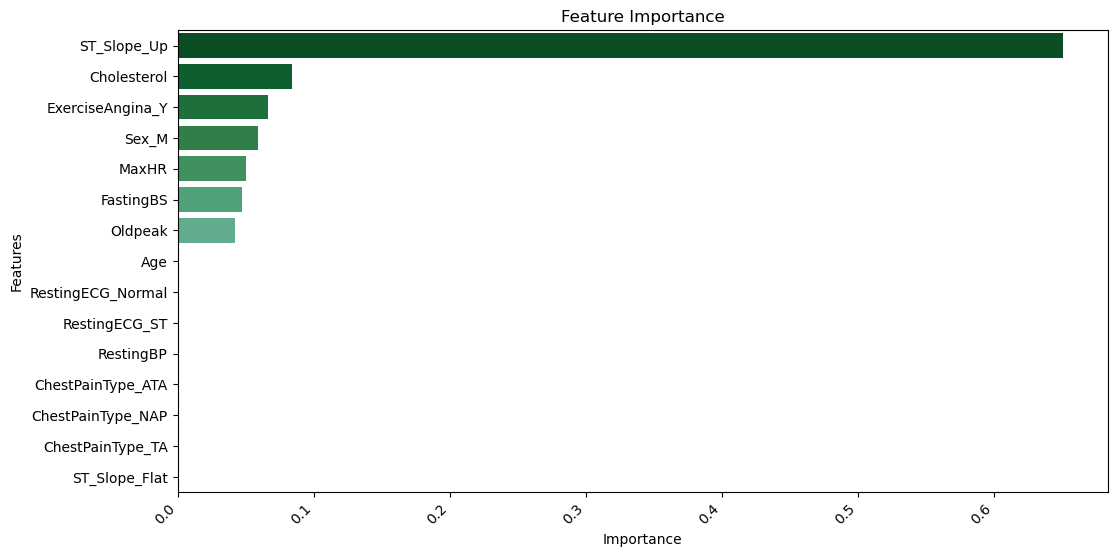

In [188]:
#create bar plot
plt.figure(figsize=(12,6))
chart = sns.barplot(x=importances, y=importances.index, palette=sns.color_palette("BuGn_r", n_colors=len(importances)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [189]:
from sklearn import metrics
# Calculate accuracy for complete decision tree
accuracy = metrics.accuracy_score(y_test, y_predict_3)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predict_3)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.875

Confusion Matrix:
 [[67 10]
 [13 94]]


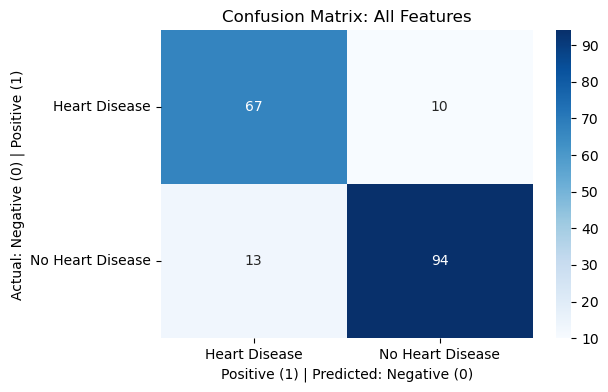

In [190]:
# Compute confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_predict_3)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Heart Disease', 'No Heart Disease'], 
            yticklabels=['Heart Disease', 'No Heart Disease'])

plt.xlabel("Positive (1) | Predicted: Negative (0)")
plt.ylabel("Actual: Negative (0) | Positive (1)")
plt.yticks(rotation=0)
plt.title("Confusion Matrix: All Features")
plt.show()


Accuracy: 0.875

Confusion Matrix:
 [[66 11]
 [12 95]]


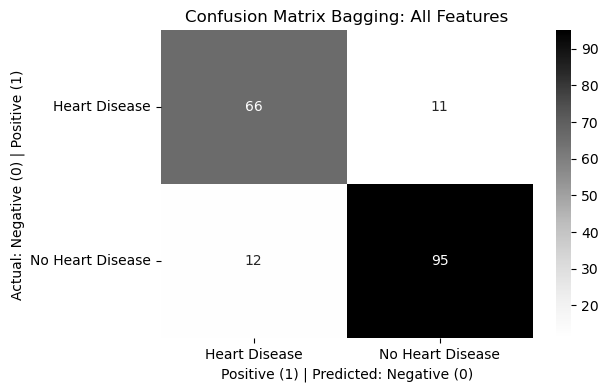

In [191]:
# Let take a look at the model using a Baging Classifier
# 100 estimators cause it's most stabled
bagging_all = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                                max_samples=1.0, random_state=42)

# Train the model
bagging_all.fit(X_train, y_train)

# Model predictions
y_pred_bag = bagging_all.predict(X_test)

# Calculate accuracy and confusion matrix of Bagging
accuracy = metrics.accuracy_score(y_test, y_pred_bag)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_bag)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

# Visual of matrix
conf_bag = confusion_matrix(y_test, y_pred_bag)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_bag, annot=True, fmt='d', cmap='Greys',
            xticklabels=['Heart Disease', 'No Heart Disease'],
            yticklabels=['Heart Disease', 'No Heart Disease'])

plt.xlabel("Positive (1) | Predicted: Negative (0)")
plt.ylabel("Actual: Negative (0) | Positive (1)")
plt.yticks(rotation=0)
plt.title("Confusion Matrix Bagging: All Features")
plt.show()

# The model achieves the same accuracy as the single decision tree one of 87.5%
# The Bagging Classifier correctly classified one more positive instance 
# but misclassified one extra negative instance compared to the single Decision Tree
# They perform similarly overall


Accuracy: 0.8641304347826086

Confusion Matrix:
 [[65 12]
 [13 94]]


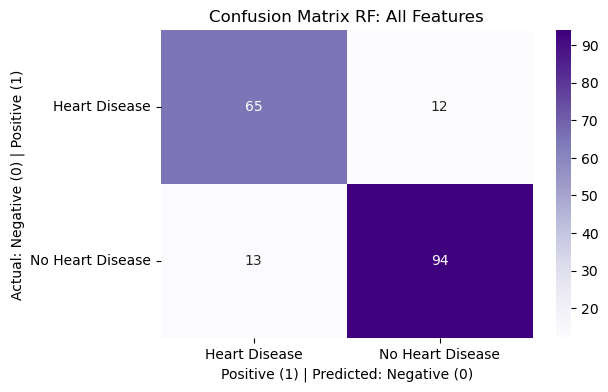

In [260]:
# Lets take a look at the model using Random Forest Classifier

# n_estimators = number of trees to create
# criterion = ""gini", "entropy", "log_loss"} default="gini"
# max_features = {"sqrt", "log2", "None"} default = "sqrt"
alltree = RandomForestClassifier(n_estimators=500, random_state=42)
# 500 estimators cause it's the most stable and accurate

# Train the model
alltree.fit(X_train, y_train)

# Model predictions
y_pred_rf = alltree.predict(X_test)

# Calculate accuracy of Random Forest
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

# Visual of matrix
conf_RF = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_RF, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Heart Disease', 'No Heart Disease'],
            yticklabels=['Heart Disease', 'No Heart Disease'])

plt.xlabel("Positive (1) | Predicted: Negative (0)")
plt.ylabel("Actual: Negative (0) | Positive (1)")
plt.yticks(rotation=0)
plt.title("Confusion Matrix RF: All Features")
plt.show()

# Now compared to the other two models, the RF is 86.41%
# Slightly lower
# Same TP as single decision tree
# Same bagging, one less single
# Highest FN between both models
# Lowest TN, yet all data relatively similar

## Analyzing Most and Least Influential Features on Heart Disease Prediction using Scatter Plots
After analyzing which feature is most likely to influence "Heart Disease", i'll now compare them using Scatter Plots

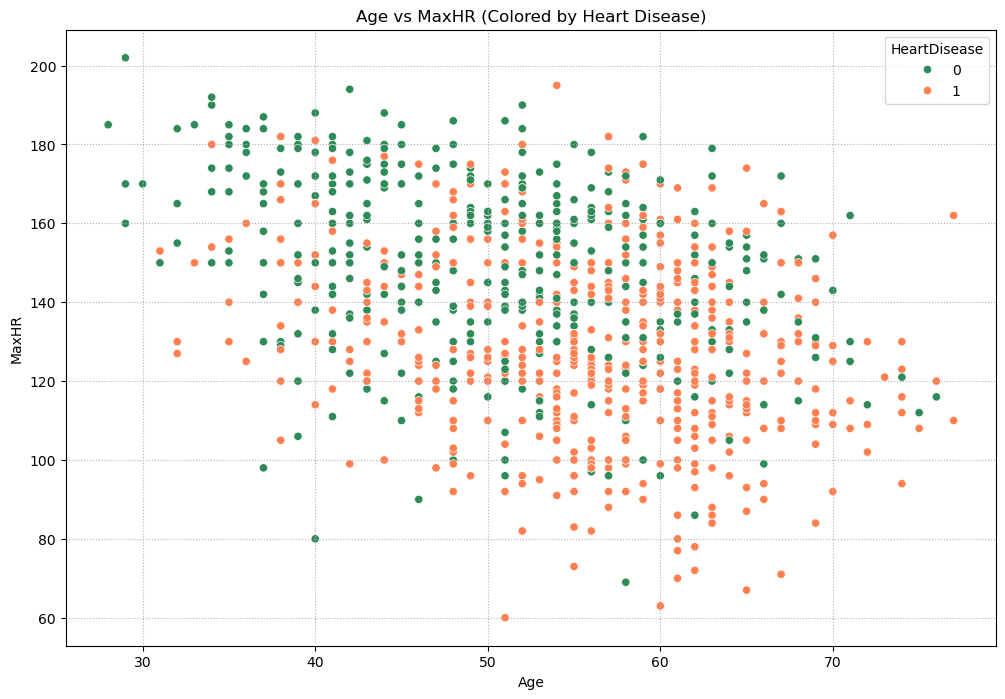

In [194]:
# Load dataset
heart = pd.read_csv('heart.csv')

plt.figure(figsize=(12, 8))

# biologically relevant relationship
sns.scatterplot(data=heart, x='Age', y='MaxHR', hue='HeartDisease', palette = ['seagreen', 'coral'])
plt.grid(True, linestyle=':')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Age vs MaxHR (Colored by Heart Disease)')
plt.show()

The Scatter plot above states that younger individuals tend to have a higher maximum heart rate. Also, those with heart disease (orange points) appear to cluster at lower MaxHR values

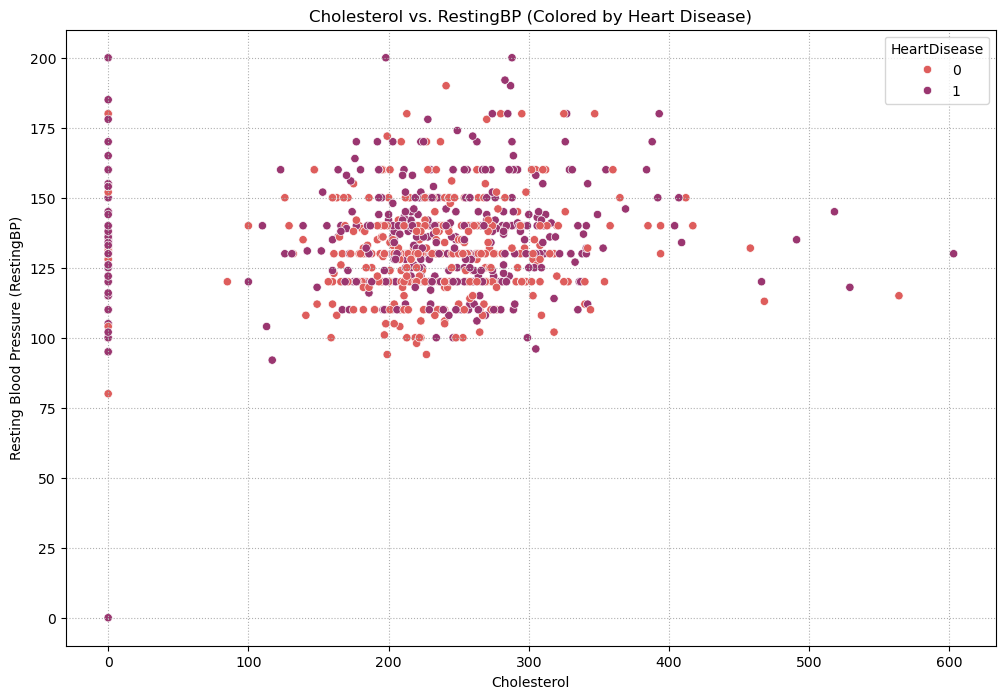

In [196]:
# Load dataset
heart = pd.read_csv('heart.csv')

# Scatter Plot Palette
color = sns.color_palette("flare", n_colors=2).as_hex() 

plt.figure(figsize=(12, 8))
sns.scatterplot(data=heart, x='Cholesterol', y='RestingBP', hue='HeartDisease', palette=color)
plt.grid(True, linestyle=':')
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure (RestingBP)')
plt.title('Cholesterol vs. RestingBP (Colored by Heart Disease)')
plt.show()

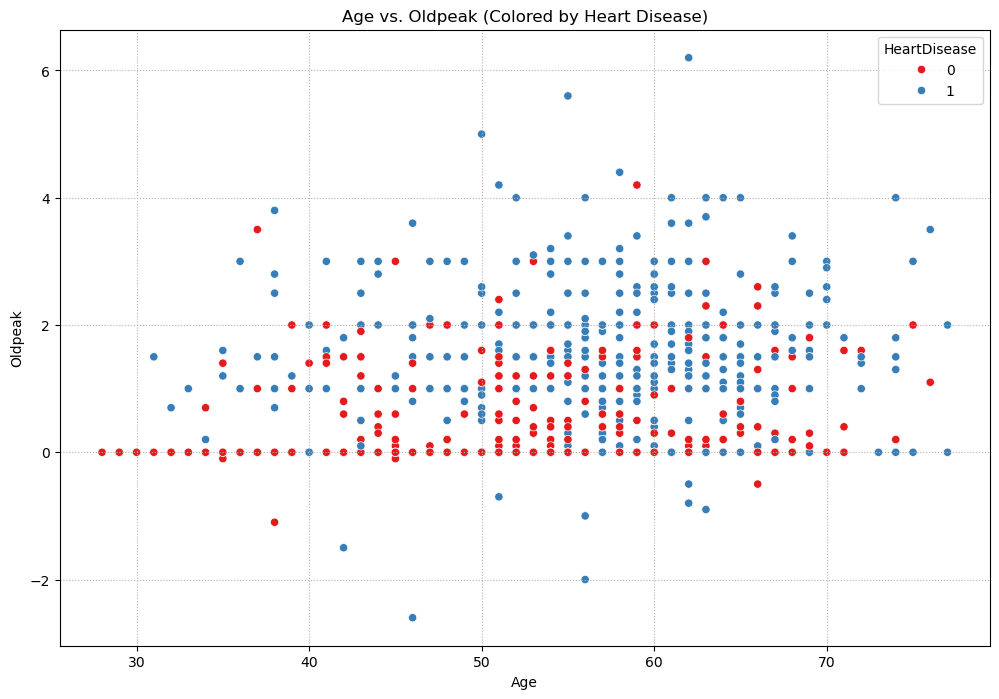

In [197]:
# Load dataset
heart = pd.read_csv('heart.csv')

# Scatter Plot Palette
color = sns.color_palette("Set1", n_colors=2).as_hex()

# Oldpeak vs. Age
plt.figure(figsize=(12, 8))
sns.scatterplot(data=heart, x='Age', y='Oldpeak', hue='HeartDisease', palette=color)
plt.grid(True, linestyle=':')
plt.xlabel('Age')
plt.ylabel('Oldpeak')
plt.title('Age vs. Oldpeak (Colored by Heart Disease)')
plt.show()

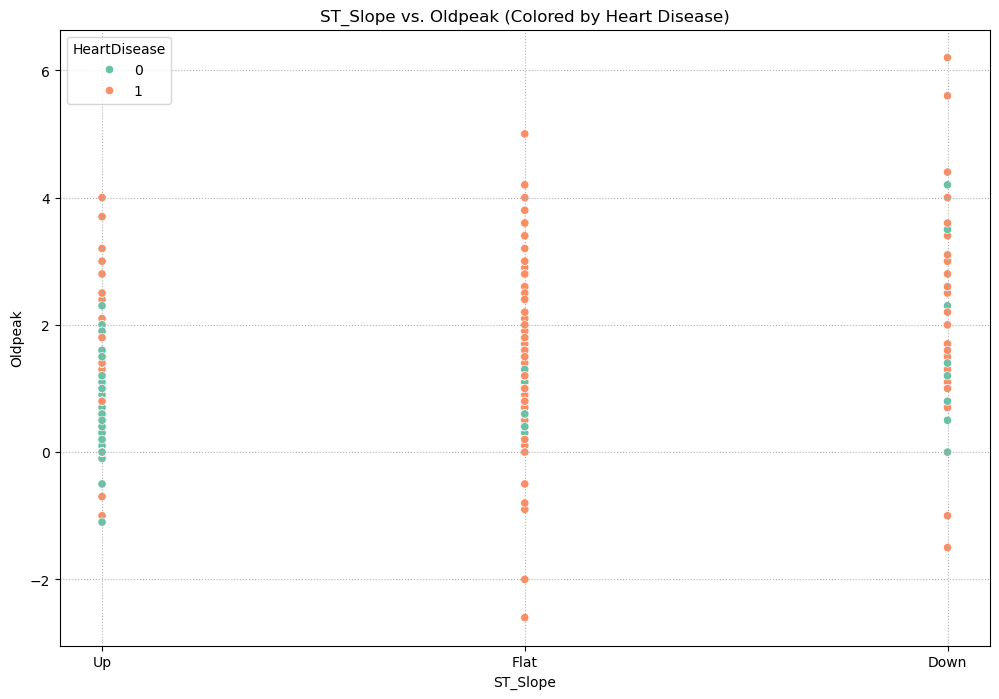

In [198]:
# Load dataset
heart = pd.read_csv('heart.csv')

# Scatter Plot Palette
color = sns.color_palette("Set2", n_colors=2).as_hex()

# Oldpeak vs. Age
plt.figure(figsize=(12, 8))
sns.scatterplot(data=heart, x='ST_Slope', y='Oldpeak', hue='HeartDisease', palette=color)
plt.grid(True, linestyle=':')
plt.xlabel('ST_Slope')
plt.ylabel('Oldpeak')
plt.title('ST_Slope vs. Oldpeak (Colored by Heart Disease)')
plt.show()